<a href="https://colab.research.google.com/github/imayush-mishra/Blogg/blob/main/Product_Market_Fit_Dataful.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

urayushmishra_dataful_path = kagglehub.dataset_download('urayushmishra/dataful')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataful/vahan.csv
/kaggle/input/dataful/aqi.csv
/kaggle/input/dataful/idsp.csv
/kaggle/input/dataful/population_projection.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [ ]:
# Primary Dataset

aqi = pd.read_csv('/kaggle/input/dataful/aqi.csv')
aqi.head()

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
0,30-04-2025,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
1,30-04-2025,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
2,30-04-2025,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
3,30-04-2025,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN
4,30-04-2025,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN


In [ ]:
aqi.columns

Index(['date', 'state', 'area', 'number_of_monitoring_stations',
       'prominent_pollutants', 'aqi_value', 'air_quality_status', 'unit',
       'note'],
      dtype='object')

In [ ]:
aqi.describe

<bound method NDFrame.describe of               date           state          area  \
0       30-04-2025     Maharashtra      Amravati   
1       30-04-2025           Bihar        Purnia   
2       30-04-2025  Madhya Pradesh         Katni   
3       30-04-2025    Chhattisgarh       Tumidih   
4       30-04-2025           Assam      Byrnihat   
...            ...             ...           ...   
235780  01-04-2022           Bihar         Arrah   
235781  01-04-2022       Rajasthan        Jaipur   
235782  01-04-2022     Maharashtra    Chandrapur   
235783  01-04-2022   Uttar Pradesh      Varanasi   
235784  01-04-2022          Odisha  Brajrajnagar   

        number_of_monitoring_stations prominent_pollutants  aqi_value  \
0                                   2                 PM10         78   
1                                   1                   CO         56   
2                                   1                   O3         98   
3                                   1            

In [ ]:
# Secondary Datasets

health = pd.read_csv('/kaggle/input/dataful/idsp.csv', encoding='latin-1')
vehicle = pd.read_csv('/kaggle/input/dataful/vahan.csv')
population = pd.read_csv('/kaggle/input/dataful/population_projection.csv')

# Primary Analysis

#### List the top 5 and bottom 5 areas with highest average AQI. *(Consider areas which contains data from last 6 months: December 2024 to May 2025)*

In [ ]:
# Filter the dataframe to contain only last 6 months data

# First, make sure 'date' column is in datetime format
aqi['date'] = pd.to_datetime(aqi['date'], dayfirst=True)
aqi_recent6 = aqi[(aqi['date'] >= '2024-12-01') & (aqi['date'] <= '2025-05-31')]

print("Shape of dataframe with only last 6 months data is", aqi_recent6.shape)
aqi_recent6.head()

Shape of dataframe with only last 6 months data is (34878, 9)


,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
0,2025-04-30,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
1,2025-04-30,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
2,2025-04-30,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
3,2025-04-30,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN
4,2025-04-30,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN


In [ ]:
#Group by area and calculate the average AQI
avg_aqi = aqi_recent6.groupby(['state', 'area'])['aqi_value'].mean().reset_index()

#Sort by AQI
sorted_aqi = avg_aqi.sort_values(by='aqi_value', ascending = False)

#Get top 5 and bottom 5
top5 = sorted_aqi.head()
bottom5 = sorted_aqi.tail()

In [ ]:
#Display top 5 areas with highest AQI
print('Top 5 areas with highest average AQI: ')
top5

Top 5 areas with highest average AQI: 


,state,area,aqi_value
11,Assam,Byrnihat,284.194915
50,Delhi,Delhi,238.920000
27,Bihar,Hajipur,233.666667
59,Haryana,Bahadurgarh,226.437500
66,Haryana,Gurugram,204.143836


In [ ]:
#Display bottom 5 areas with highest AQI
print('Bottom 5 areas with highest average AQI: ')
bottom5

Bottom 5 areas with highest average AQI: 


,state,area,aqi_value
90,Karnataka,Chamarajanagar,44.807692
111,Karnataka,Vijayapura,44.328767
103,Karnataka,Madikeri,42.951049
242,Tamil Nadu,Palkalaiperur,42.794872
250,Tamil Nadu,Tirunelveli,33.310078


#### List out top 2 and bottom 2 prominent pollutants for each state of southern India. *(Consider data post covid: 2022 onwards)*

In [ ]:
#Check for the date against given condition
aqi.tail()

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
235780,2022-04-01,Bihar,Arrah,1,PM10,210,Poor,number_of_monitoring_stations in Absolute Numb...,NaN
235781,2022-04-01,Rajasthan,Jaipur,3,"PM2.5,PM10",158,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN
235782,2022-04-01,Maharashtra,Chandrapur,2,PM2.5,201,Poor,number_of_monitoring_stations in Absolute Numb...,NaN
235783,2022-04-01,Uttar Pradesh,Varanasi,4,PM10,128,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN
235784,2022-04-01,Odisha,Brajrajnagar,1,O3,270,Poor,number_of_monitoring_stations in Absolute Numb...,NaN


In [ ]:
aqi['state'].unique()

array(['Maharashtra', 'Bihar', 'Madhya Pradesh', 'Chhattisgarh', 'Assam',
       'Manipur', 'Kerala', 'West Bengal', 'Odisha', 'Karnataka',
       'Gujarat', 'Uttarakhand', 'Tamil Nadu', 'Andhra Pradesh',
       'Rajasthan', 'Uttar Pradesh', 'Punjab', 'Mizoram', 'Chandigarh',
       'Telangana', 'Puducherry', 'Meghalaya', 'Himachal Pradesh',
       'Jharkhand', 'Haryana', 'Arunachal Pradesh', 'Nagaland', 'Tripura',
       'Delhi', 'Andaman and Nicobar Islands', 'Sikkim',
       'Jammu and Kashmir'], dtype=object)

In [ ]:
#Create dataframe with Southern India states only

southern_states = ['Telangana', 'Puducherry', 'Karnataka', 'Tamil Nadu', 'Andhra Pradesh', 'Kerala', 'Andaman and Nicobar Islands']
aqi_south = aqi[aqi['state'].isin(southern_states)]

In [ ]:
# Count frequency of each pollutant per state
pollutants_count_south = aqi_south.groupby(['state', 'prominent_pollutants']).size().reset_index(name = 'count')

# Sort values within each state
pollutants_sorted_south = pollutants_count_south.sort_values(['state', 'count'], ascending=[True, False])

In [ ]:
# Function to get top 2 and bottom 2 for each state
def extract_top_bottom(group):
    top_2 = group.head(2)
    bottom_2 = group.tail(2)
    return pd.concat([top_2, bottom_2])

In [ ]:
# Apply function to each state
result = pollutants_sorted_south.groupby('state').apply(extract_top_bottom).reset_index(drop=True)

# Display the final result
print(result)

                          state prominent_pollutants  count
0   Andaman and Nicobar Islands                 PM10     36
1   Andaman and Nicobar Islands                   CO     10
2   Andaman and Nicobar Islands                   O3      5
3   Andaman and Nicobar Islands                PM2.5      2
4                Andhra Pradesh                 PM10   3182
5                Andhra Pradesh                PM2.5   1757
6                Andhra Pradesh    PM10,NO2,PM2.5,O3      1
7                Andhra Pradesh          PM2.5,CO,O3      1
8                     Karnataka                 PM10  13404
9                     Karnataka                   CO   2913
10                    Karnataka            PM2.5,NO2      1
11                    Karnataka               SO2,O3      1
12                       Kerala                 PM10   3167
13                       Kerala                PM2.5   1123
14                       Kerala                  SO2      7
15                       Kerala         

#### Does AQI improve on weekends vs weekdays in Indian metro cities (Delhi, Mumbai, Chennai, Kolkata, Bengaluru, Hyderabad, Ahmedabad, Pune)? *(Consider data from last 1 year)*

In [ ]:
# Filter the dataframe to contain only last 1 year data

# First, make sure 'date' column is in datetime format
aqi['date'] = pd.to_datetime(aqi['date'], dayfirst=True)
aqi_last_yr = aqi[(aqi['date'] >= '2024-04-30') & (aqi['date'] <= '2025-04-30')]

print("Shape of dataframe with only last 6 months data is", aqi_last_yr.shape)
aqi_last_yr.head()

Shape of dataframe with only last 6 months data is (86172, 9)


,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
0,2025-04-30,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
1,2025-04-30,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
2,2025-04-30,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
3,2025-04-30,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN
4,2025-04-30,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN


In [ ]:
#Filter the dataframe to contain data for metro cities only

#List of metro cities
metro_cities = ['Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Bengaluru', 'Hyderabad', 'Ahmedabad', 'Pune']

aqi_metro_last_yr = aqi_last_yr[aqi_last_yr['area'].isin(metro_cities)]
aqi_metro_last_yr.head()

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
11,2025-04-30,Gujarat,Ahmedabad,8,"PM2.5,PM10",110,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN
34,2025-04-30,Tamil Nadu,Chennai,7,"PM10,O3,CO",46,Good,number_of_monitoring_stations in Absolute Numb...,NaN
92,2025-04-30,West Bengal,Kolkata,6,"PM10,NO2",65,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
95,2025-04-30,Telangana,Hyderabad,11,"PM2.5,PM10",74,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
99,2025-04-30,Karnataka,Bengaluru,13,"PM2.5,PM10",84,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN


In [ ]:
#Classifying weekdays and weekends

aqi_metro_last_yr['date'] = pd.to_datetime(aqi_metro_last_yr['date'])
aqi_metro_last_yr['weekend'] = aqi_metro_last_yr['date'].apply(lambda x: 1 if x.weekday()>4 else 0)

aqi_metro_last_yr.head()

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note,weekend
11,2025-04-30,Gujarat,Ahmedabad,8,"PM2.5,PM10",110,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN,0
34,2025-04-30,Tamil Nadu,Chennai,7,"PM10,O3,CO",46,Good,number_of_monitoring_stations in Absolute Numb...,NaN,0
92,2025-04-30,West Bengal,Kolkata,6,"PM10,NO2",65,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,0
95,2025-04-30,Telangana,Hyderabad,11,"PM2.5,PM10",74,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,0
99,2025-04-30,Karnataka,Bengaluru,13,"PM2.5,PM10",84,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,0


In [ ]:
#Group and aggregate

aqi_compare = aqi_metro_last_yr.groupby(['area', 'weekend'])['aqi_value'].mean().reset_index()

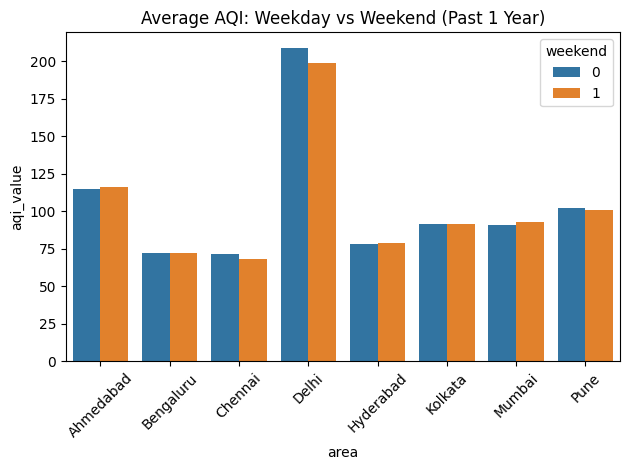

In [ ]:
#bar plot

sns.barplot(data=aqi_compare, x='area', y='aqi_value', hue='weekend')
plt.title('Average AQI: Weekday vs Weekend (Past 1 Year)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Which months consistently show the worst air quality across Indian states — *(Consider top 10 states with high distinct areas)*

In [ ]:
#Top 10 cities with high distinct areas

top10_states = aqi.groupby('state')['area'].nunique().sort_values(ascending = False).head(10).index
top10_states

Index(['Rajasthan', 'Maharashtra', 'Karnataka', 'Tamil Nadu', 'Bihar',
       'Haryana', 'Uttar Pradesh', 'Odisha', 'Madhya Pradesh',
       'Andhra Pradesh'],
      dtype='object', name='state')

In [ ]:
#Comparing month wise air quality for top 10 states

import calendar

aqi_monthly = aqi[aqi['state'].isin(top10_states)]
aqi_monthly['month_name'] = aqi_monthly['date'].dt.month
aqi_monthly['month_name'] = aqi_monthly['month_name'].apply(lambda x: calendar.month_name[x])
aqi_monthly.head()

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note,month_name
0,2025-04-30,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,April
1,2025-04-30,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,April
2,2025-04-30,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,April
8,2025-04-30,Odisha,Nayagarh,1,PM10,58,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,April
10,2025-04-30,Karnataka,Hubballi,1,PM10,46,Good,number_of_monitoring_stations in Absolute Numb...,NaN,April


In [ ]:
aqi_monthly = (
    aqi_monthly.groupby(['state', 'month_name'])['aqi_value'].mean().reset_index().sort_values(by='aqi_value', ascending=False)
)

In [ ]:
aqi_monthly

,state,month_name,aqi_value
14,Bihar,December,251.805770
16,Bihar,January,245.566933
33,Haryana,November,239.460372
21,Bihar,November,229.583671
117,Uttar Pradesh,November,200.607203
...,...,...,...
42,Karnataka,June,50.309524
5,Andhra Pradesh,July,49.711896
37,Karnataka,August,46.606011
41,Karnataka,July,44.985893


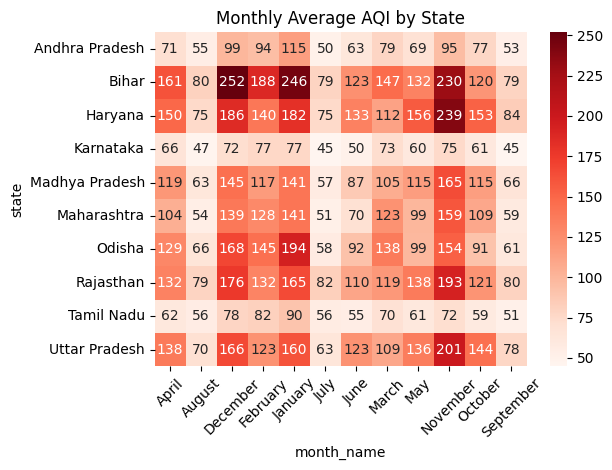

In [ ]:
pivot_table = aqi_monthly.pivot_table(
    index='state',
    columns='month_name',
    values='aqi_value',
    aggfunc='mean'  # default, but makes intention clear
)
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Reds")
plt.title("Monthly Average AQI by State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Filter Top 10 States with High Area Coverage
top_states = aqi.groupby("state")["area"].nunique().nlargest(10).index
aqi_top = aqi[aqi["state"].isin(top_states)]

# Step 2: Monthly AQI Averages per State
monthly_avg = aqi_top.groupby(["state", "month"])["aqi_value"].mean().unstack()

# Step 3: Monthly Status Counts (Poor, Very Poor, Severe)
status_counts = aqi_top[aqi_top["air_quality_status"].isin(["Poor", "Very Poor", "Severe"])]
monthly_status_freq = status_counts.groupby(["state", "month"])["air_quality_status"].count().unstack(fill_value=0)

# Step 4: Consistency Tracker
monthly_flags = (monthly_status_freq > threshold).astype(int)  # threshold could be tuned based on frequency
month_scores = monthly_flags.sum(axis=0).sort_values(ascending=False)

# Optional: Blended Score
df_top["status_score"] = df_top["air_quality_status"].map({
    "Good": 1, "Moderate": 2, "Poor": 3, "Very Poor": 4, "Severe": 5
})
consistency_metric = df_top.groupby(["state", "month"])["status_score"].mean().unstack()


KeyError: 'month'

In [ ]:
#`monthly_avg` is your DataFrame with average AQI per state and month
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_avg, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5)
plt.title("Monthly Average AQI Across Top 10 States")
plt.xlabel("Month")
plt.ylabel("State")
plt.tight_layout()
plt.show()


NameError: name 'monthly_avg' is not defined

<Figure size 1200x600 with 0 Axes>

#### For the city of Bengaluru, how many days fell under each air quality category (e.g., Good, Moderate, Poor, etc.) between March and May 2025?

In [ ]:
aqi_blr = aqi[aqi['area']=='Bengaluru']
aqi_blr_short = aqi_blr[(aqi_blr['date'] >= '2025-03-01') & (aqi_blr['date'] <= '2025-05-01')]
aqi_blr_short.groupby('air_quality_status')['air_quality_status'].count()

air_quality_status
Moderate        13
Satisfactory    48
Name: air_quality_status, dtype: int64

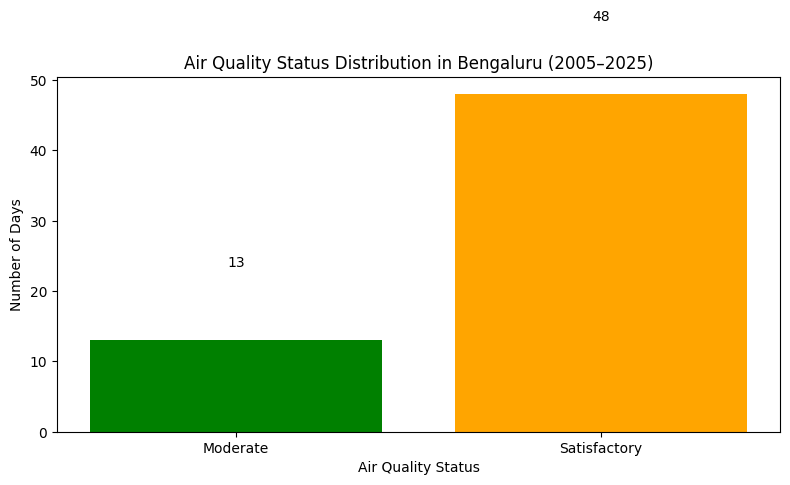

In [ ]:
# Data from your output
categories = ['Moderate', 'Satisfactory']
counts = [13, 48]

# Create bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, counts, color=['green', 'orange'])

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, yval, ha='center', va='bottom')

plt.xlabel('Air Quality Status')
plt.ylabel('Number of Days')
plt.title('Air Quality Status Distribution in Bengaluru (2005–2025)')
plt.tight_layout()
plt.show()

#### List the top two most reported disease illnesses in each state over the past three years, along with the corresponding average Air Quality Index (AQI) for that period.

In [ ]:
health.head()

,year,week,outbreak_starting_date,reporting_date,state,district,disease_illness_name,status,cases,deaths,unit,note
0,2025,16,15-04-2025,15-04-2025,Andhra Pradesh,Kakinada,Acute Diarrheal Disease,Reported,22,0,"cases in absolute number, deaths in absolute n...",NaN
1,2025,16,15-04-2025,17-04-2025,Assam,Biswanath,Chickenpox,Reported,1,1,"cases in absolute number, deaths in absolute n...",NaN
2,2025,16,19-04-2025,20-04-2025,Assam,Dhemaji,Food Poisoning,Reported,16,0,"cases in absolute number, deaths in absolute n...",NaN
3,2025,16,19-04-2025,19-04-2025,Bihar,Gopalganj,Fever with Rash,Reported,5,0,"cases in absolute number, deaths in absolute n...",NaN
4,2025,16,12-04-2025,15-04-2025,Bihar,Madhubani,Acute Diarrheal Disease,Reported,21,0,"cases in absolute number, deaths in absolute n...",NaN


In [ ]:
disease_severity = health.groupby(['state','disease_illness_name']).size().reset_index(name='count')

#Get top 2 disease per state
top2_disease = disease_severity.sort_values(['state', 'count'], ascending = [True, False]).groupby('state').head(2)
top2_disease

,state,disease_illness_name,count
0,Andaman and Nicobar Islands,Acute Diarrheal Disease,3
1,Andaman and Nicobar Islands,Chickenpox,1
3,Andhra Pradesh,Acute Diarrheal Disease,91
9,Andhra Pradesh,Food Poisoning,25
16,Arunachal,Rabies,1
...,...,...,...
548,Uttar Pradesh,Food Poisoning,46
561,Uttarakhand,Acute Diarrheal Disease,16
565,Uttarakhand,Dengue,7
578,West Bengal,Acute Diarrheal Disease,81


In [ ]:
#Average aqi per state over the same period
aqi_avg = aqi.groupby('state')['aqi_value'].mean().reset_index()
aqi_avg.head()

,state,aqi_value
0,Andaman and Nicobar Islands,57.706897
1,Andhra Pradesh,77.507701
2,Arunachal Pradesh,54.485265
3,Assam,114.117456
4,Bihar,157.158122


In [ ]:
final_aqi_disease = top2_disease.merge(aqi_avg, on = 'state')
final_aqi_disease.rename(columns={'aqi_value': 'avg_aqi_2022_2025'}, inplace = True)
final_aqi_disease.head(10)

,state,disease_illness_name,count,avg_aqi_2022_2025
0,Andaman and Nicobar Islands,Acute Diarrheal Disease,3,57.706897
1,Andaman and Nicobar Islands,Chickenpox,1,57.706897
2,Andhra Pradesh,Acute Diarrheal Disease,91,77.507701
3,Andhra Pradesh,Food Poisoning,25,77.507701
4,Arunachal Pradesh,Acute Diarrheal Disease,9,54.485265
5,Arunachal Pradesh,Chickenpox,8,54.485265
6,Assam,Acute Diarrheal Disease,88,114.117456
7,Assam,Food Poisoning,48,114.117456
8,Bihar,Fever with Rash,63,157.158122
9,Bihar,Acute Diarrheal Disease,53,157.158122


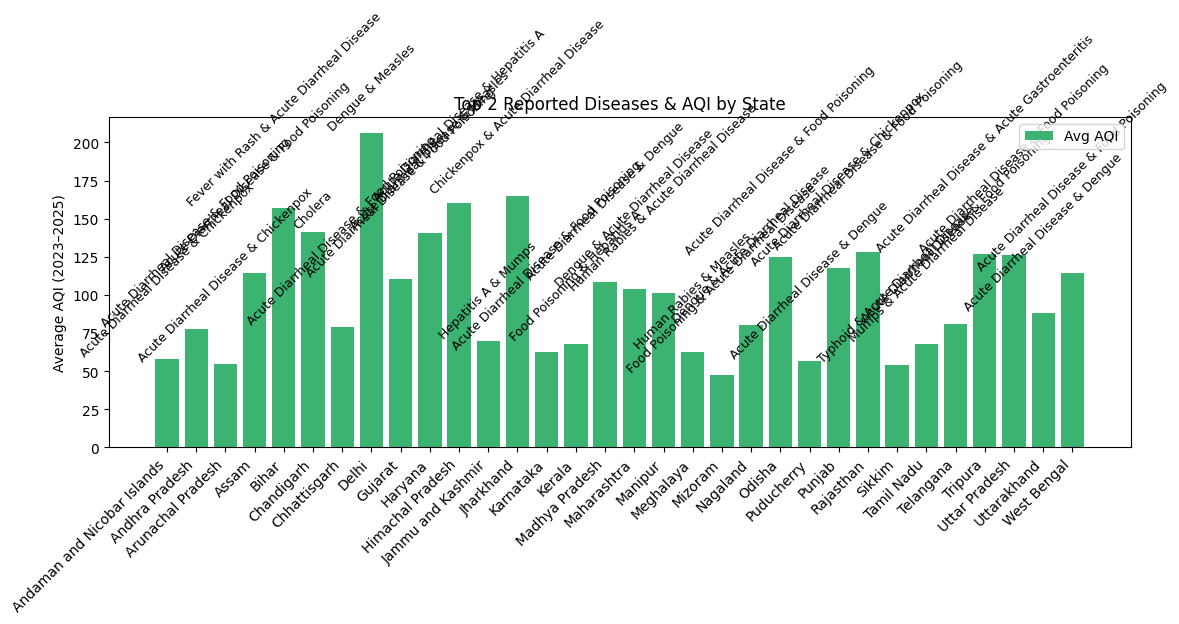

In [ ]:
# Step 1: Pivot to get top 2 diseases per state
pivoted = final_aqi_disease.pivot_table(index='state',
                                    columns='disease_illness_name',
                                    values='count',
                                    aggfunc='sum',
                                    fill_value=0)

# Step 2: Get top 2 diseases per state
top_diseases = (
    final_aqi_disease.groupby(['state', 'disease_illness_name'])['count']
    .sum()
    .reset_index()
    .sort_values(['state', 'count'], ascending=[True, False])
    .groupby('state')
    .head(2)
)

# Step 3: Prepare labels
disease_labels = (
    top_diseases.groupby('state')['disease_illness_name']
    .apply(lambda x: ' & '.join(x))
    .reset_index()
)

# Step 4: Merge with AQI
aqi_data = final_aqi_disease[['state', 'avg_aqi_2022_2025']].drop_duplicates()
plot_df = aqi_data.merge(disease_labels, on='state')

# Step 5: Plot
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(plot_df))
aqi = plot_df['avg_aqi_2022_2025']

ax.bar(x, aqi, color='mediumseagreen', label='Avg AQI')

# Add disease labels
for i in range(len(plot_df)):
    ax.text(x[i], aqi[i] + 2, plot_df['disease_illness_name'][i],
            ha='center', fontsize=9, rotation=45)

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(plot_df['state'], rotation=45, ha='right')
ax.set_ylabel('Average AQI (2023–2025)')
ax.set_title('Top 2 Reported Diseases & AQI by State')
ax.legend()

plt.tight_layout()
plt.show()


#### List the top 5 states with high EV adoption and analyse if their average AQI is significantly better compared to states with lower EV adoption